In [1]:
%matplotlib inline
import numpy as np

from astropy import units as u
from astropy.io import fits

import matplotlib.pyplot as plt

import aplpy
import angular_momentum_calc as AMC

## IRAS 03282 (aka Per 5) From Tobin et al. (2011, http://iopscience.iop.org/0004-637X/740/1/45/pdf/apj_740_1_45.pdf)

File names for FITS files of mom-0 for NH$_3$(1,1) and (2,2).
Also, we define the YSO position (to be used for distances)... preliminary.

In [18]:
file_v11='IRAS03282_Vlsr_v1.fits'
#file_v22='fits_files/IRAS03282_Per5/IRAS03282.NH3_22_QA.weighted_coord.fits'
x0=239
y0=254
ra0=15*(3+(31+20.94/60.0)/60.0)
dec0=(30+(45+30.3/60.0)/60.0)

241.532036713 253.600172505 60
181 302 193 314
(121, 121)
11.7612381687
[-60.53203671259854, 60.46796328740146, -60.600172505200703, 60.399827494799297]


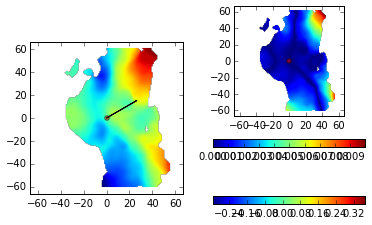

In [28]:
d_Per5_11_bin, j_Per5_11_bin, dd_Per5_11_bin, dj_Per5_11_bin = AMC.calculate_j( file_v11, distance=250., sep_max=60, ra0=ra0, dec0=dec0, angle=np.radians(30.))

## HH211 (aka Per 1) From Tanner & Arce (2011), http://iopscience.iop.org/0004-637X/726/1/40/pdf/apj_726_1_40.pdf

In [4]:
file_v11='IC348_Vlsr_v1.fits'
#file_v22='fits_files/HH211_Per1/IC348.NH3_22_QA.weighted_coord.fits'
x0=126
y0=126
ra0= 15*(3+(43+56.52/60.0)/60.)
dec0=   (32+(0+52.80/60.0)/60.)

127.745626382 130.799999935 50
77 178 80 181
(101, 101)
2.72427057795
[-50.745626382247124, 50.254373617752876, -50.799999934523356, 50.200000065476644]


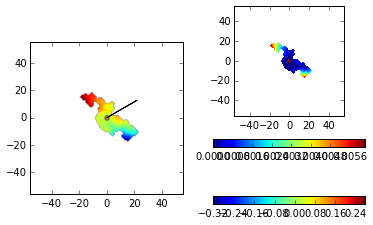

In [5]:
d_Per1_11_bin, j_Per1_11_bin, dd_Per1_11_bin, dj_Per1_11_bin = AMC.calculate_j( file_v11, distance=250., sep_max=50, ra0=ra0, dec0=dec0, angle=np.radians(30.))

## L1451mm. From Pineda et al. (2010)

In [6]:
file_v11='L1451mm_Vlsr_v1.fits'
#file_vc18o='fits_files/L1451/L1451mm_N2Hp_Vc.fits'
x0=49
y0=50
ra0= 15*(3+(25+10.21/60.0)/60.)
dec0=  (30+(23+55.30/60.0)/60.)

131.458196715 126.300008754 20
111 152 106 147
(41, 41)
4.90055263533
[-20.458196715246231, 20.541803284753769, -20.300008753755577, 20.699991246244423]


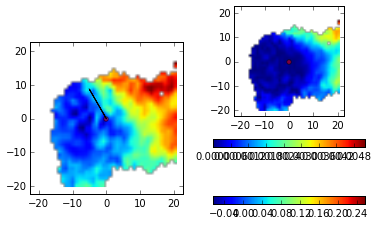

In [7]:
d_L1451_11_bin, j_L1451_11_bin, dd_L1451_11_bin, dj_L1451_11_bin = AMC.calculate_j( file_v11, distance=250., sep_max=20, ra0=ra0, dec0=dec0, angle=np.radians(120.))

## Load simulations

In [8]:
simL5_1='sim_Zhao/lambda5AMData220.txt'
simL5_2='sim_Zhao/lambda5AMData325.txt'
simL5_3='sim_Zhao/lambda5AMData375.txt'

r_simL5_1, j_simL5_1 = np.loadtxt(simL5_1, usecols=(0, 2), unpack=True)
r_simL5_2, j_simL5_2 = np.loadtxt(simL5_2, usecols=(0, 2), unpack=True)
r_simL5_3, j_simL5_3 = np.loadtxt(simL5_3, usecols=(0, 2), unpack=True)

In [9]:
simL10_1='sim_Zhao/lambda10AMData220.txt'
simL10_2='sim_Zhao/lambda10AMData325.txt'
simL10_3='sim_Zhao/lambda10AMData375.txt'

r_simL10_1, j_simL10_1 = np.loadtxt(simL10_1, usecols=(0, 2), unpack=True)
r_simL10_2, j_simL10_2 = np.loadtxt(simL10_2, usecols=(0, 2), unpack=True)
r_simL10_3, j_simL10_3 = np.loadtxt(simL10_3, usecols=(0, 2), unpack=True)

## Fit power-law to data
Based on http://wiki.scipy.org/Cookbook/FittingData

In [10]:
? d_Per5_11_bin

In [29]:
from pylab import *
from scipy import *
from scipy import optimize

logx = np.log( np.append(d_Per5_11_bin, np.append(d_Per1_11_bin, d_L1451_11_bin)) )
logy = np.log( np.append(j_Per5_11_bin, np.append(j_Per1_11_bin, j_L1451_11_bin)) )
logyerr = np.append(dj_Per5_11_bin/j_Per5_11_bin, np.append(dj_Per1_11_bin/j_Per1_11_bin, dj_L1451_11_bin/j_L1451_11_bin))

# define our (line) fitting function
powerlaw = lambda x, amp, index: amp * (x**index)

fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [-20.0, 1.8]
out = optimize.leastsq(errfunc, pinit, args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print pfinal
print covar

index = pfinal[1]
amp = np.exp(pfinal[0])

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

print amp, index
print ampErr, indexErr
 

[-23.39853649   2.13877992]
[[ 2.57684124 -0.29748131]
 [-0.29748131  0.03443902]]
6.88881811825e-11 2.13877992329
1.10583046392e-10 0.185577519006


## Plotting results

In [22]:
def add_curve_belloche(ax_i):
    x_j_sample=[100.,5000.,100000.]
    j_sample = [1e-3, 1e-3, 1e-3*np.power(x_j_sample[2]/x_j_sample[1], 2)]
    j_loss   = np.power( np.array(x_j_sample)/ x_j_sample[1], 1.6)*5e-3
    j_v_cte  = np.power( np.array(x_j_sample)/ 2000.0, 1.0)*1e-3
    ax_i.plot(x_j_sample,j_sample, '--', color='black')
    ax_i.plot(x_j_sample,j_loss, ':', color='black')
#    ax_i.plot(x_j_sample,j_v_cte, ':', color='red')


In [23]:
def add_simulations(ax_i):
    ax_i.plot(r_simL5_1*(u.cm).to(u.au), j_simL5_1*(u.cm**2/u.s).to(u.km*u.pc/u.s), '--', color='red')
    ax_i.plot(r_simL5_2*(u.cm).to(u.au), j_simL5_2*(u.cm**2/u.s).to(u.km*u.pc/u.s), '--', color='blue')
    ax_i.plot(r_simL5_3*(u.cm).to(u.au), j_simL5_3*(u.cm**2/u.s).to(u.km*u.pc/u.s), '--', color='yellow')
    ax_i.plot(r_simL10_1*(u.cm).to(u.au), j_simL10_1*(u.cm**2/u.s).to(u.km*u.pc/u.s), '-', color='red')
    ax_i.plot(r_simL10_2*(u.cm).to(u.au), j_simL10_2*(u.cm**2/u.s).to(u.km*u.pc/u.s), '-', color='blue')
    ax_i.plot(r_simL10_3*(u.cm).to(u.au), j_simL10_3*(u.cm**2/u.s).to(u.km*u.pc/u.s), '-', color='yellow')


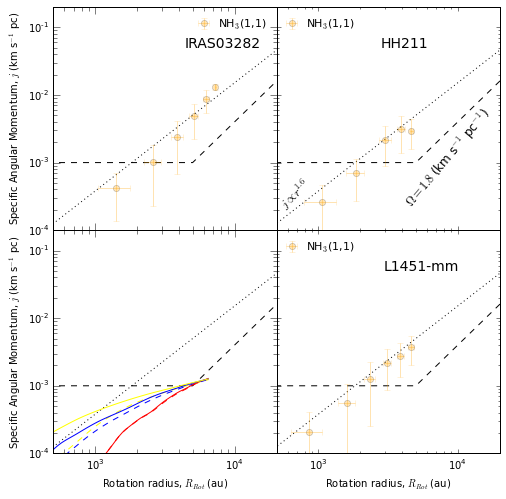

In [24]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))
plt.subplots_adjust(wspace=0,hspace=0)

#
mark_Per5='o'
mark_Per1='o'
mark_L1451='o'
c_11='orange'
c_22='green'
c_n2dp='blue'
c_c18o='red'

# Per 5 or IRAS03282
ax[0,0].errorbar(d_Per5_11_bin,   j_Per5_11_bin,  xerr=dd_Per5_11_bin,   yerr=dj_Per5_11_bin,   linestyle="None", alpha=0.3, color=c_11,  label='NH$_3$(1,1)',     zorder=30, marker=mark_Per5)
ax[0,0].text( 1.5e4, 0.05, "IRAS03282", fontsize=14, horizontalalignment='right')

# HH211 or Per 1
ax[0,1].errorbar(d_Per1_11_bin,   j_Per1_11_bin,  xerr=dd_Per1_11_bin,   yerr=dj_Per1_11_bin,   linestyle="None", alpha=0.3, color=c_11,  label='NH$_3$(1,1)',     zorder=40, marker=mark_Per1)
ax[0,1].text( 6.0e3, 0.05, "HH211", fontsize=14, horizontalalignment='right')

# L1451mm
ax[1,1].errorbar(d_L1451_11_bin,  j_L1451_11_bin, xerr=dd_L1451_11_bin,  yerr=dj_L1451_11_bin,  linestyle="None", alpha=0.3, color=c_11,  label='NH$_3$(1,1)',     zorder=50, marker=mark_L1451)
ax[1,1].text( 1.0e4, 0.05, "L1451-mm", fontsize=14, horizontalalignment='right')

# Add curves used in Belloche (2013), constant j and constant Omega
add_curve_belloche(ax[0,0])
add_curve_belloche(ax[1,0])
add_curve_belloche(ax[0,1])
add_curve_belloche(ax[1,1])

#ax[0,1].plot(x_j_sample,j_sample, '--', color='black')
#ax[0,1].plot(x_j_sample,j_loss, ':', color='black')
ax[0,1].text( 4.0e3, 4.5e-3, "$\\Omega=1.8$ (km s$^{-1}$ pc$^{-1}$)",fontsize=12, rotation =50)
ax[0,1].text( 5.0e2, 4e-4, "$j\\propto r^{1.6}$",fontsize=12, rotation =45)

#
ax[0,0].set_yscale("log")
ax[0,1].set_yscale("log")
ax[1,0].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xscale("log")
ax[0,1].set_xscale("log")
ax[1,0].set_xscale("log")
ax[1,1].set_xscale("log")

ax[0,0].set_xlim([500,20000])
#ax[1].set_xlim([500,20000])
ax[0,0].set_ylim([1e-4,0.2])
#ax[1].set_ylim([1e-4,0.1])
ax[0,0].legend( frameon=False, scatterpoints=1, numpoints=1, prop={'size':11}, handlelength=1, loc=0)
ax[0,1].legend( frameon=False, scatterpoints=1, numpoints=1, prop={'size':11}, handlelength=1, loc=2)
ax[1,1].legend( frameon=False, scatterpoints=1, numpoints=1, prop={'size':11}, handlelength=1, loc=2)
ax[1,0].legend( frameon=False, scatterpoints=1, numpoints=1, prop={'size':11}, handlelength=1, loc=2)
#ax[1].legend( frameon=False, scatterpoints=1, numpoints=1, prop={'size':11}, handlelength=1, loc=0)
ax[1,1].set_xlabel("Rotation radius, $R_{Rot}$ (au)")
ax[1,0].set_xlabel("Rotation radius, $R_{Rot}$ (au)")
ax[0,0].set_ylabel("Specific Angular Momentum, $j$ (km s$^{-1}$ pc)")
ax[1,0].set_ylabel("Specific Angular Momentum, $j$ (km s$^{-1}$ pc)")
ax[0,0].tick_params(which='major', length=7)
ax[1,0].tick_params(which='major', length=7)
ax[0,0].tick_params(which='minor', length=4)
ax[1,0].tick_params(which='minor', length=4)

plt.savefig('Dist_j_Radius_data.pdf', bbox_inches='tight')

add_simulations(ax[1,0])

plt.savefig('Dist_j_Radius_sim_data.pdf', bbox_inches='tight')

In [25]:
print np.min(d_Per19_c18o_bin)#, j_Per19_c18o_bin
print np.max(d_Per19_c18o_bin)#, j_Per19_c18o_bin
print np.min(j_Per19_c18o_bin)
print np.max(j_Per19_c18o_bin)

NameError: name 'd_Per19_c18o_bin' is not defined

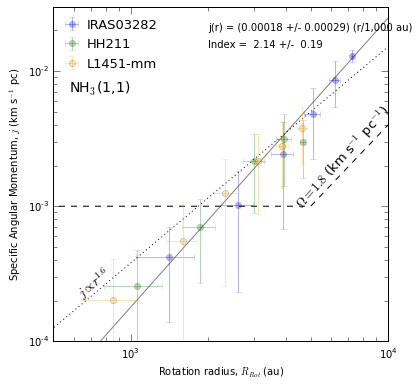

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.subplots_adjust(wspace=0,hspace=0)

#
mark_Per5='o'
mark_Per1='o'
mark_L1451='o'
c_11='orange'
c_22='green'
c_n2dp='blue'
c_c18o='red'
c_L1451='orange'
c_Per1='green'
c_Per5='blue'
#c_c18o='red'

xdata=[300.,5000.,100000.]
ax.loglog(xdata, powerlaw(xdata, amp, index), color='gray')

# Per 5 or IRAS03282
ax.errorbar(d_Per5_11_bin,   j_Per5_11_bin,  xerr=dd_Per5_11_bin,   yerr=dj_Per5_11_bin,   linestyle="None", alpha=0.3, color=c_Per5,  label='IRAS03282',     zorder=30, marker=mark_Per5)
ax.text( 1.0e3, 0.007, "NH$_3$(1,1)", fontsize=14, horizontalalignment='right')

# HH211 or Per 1
ax.errorbar(d_Per1_11_bin,   j_Per1_11_bin,  xerr=dd_Per1_11_bin,   yerr=dj_Per1_11_bin,   linestyle="None", alpha=0.3, color=c_Per1,  label='HH211',     zorder=40, marker=mark_Per1)
#ax.text( 6.0e3, 0.05, "HH211", fontsize=14, horizontalalignment='right')

# L1451mm
ax.errorbar(d_L1451_11_bin,  j_L1451_11_bin, xerr=dd_L1451_11_bin,  yerr=dj_L1451_11_bin,  linestyle="None", alpha=0.3, color=c_L1451,  label='L1451-mm',     zorder=50, marker=mark_L1451)
#ax.text( 1.0e4, 0.05, "L1451-mm", fontsize=14, horizontalalignment='right')

# Add curves used in Belloche (2013), constant j and constant Omega
add_curve_belloche(ax)

ax.text( 4.25e3, 4.75e-3, "$\\Omega=1.8$ (km s$^{-1}$ pc$^{-1}$)",fontsize=13, rotation =48)
ax.text( 6.0e2, 3e-4, "$j\\propto r^{1.6}$",fontsize=13, rotation =40)

fit_label='j(r) = ({0:5.2g} +/- {1:5.2g}) (r/1,000 au)'.format(powerlaw(1e3, amp, index), ampErr/amp * powerlaw(1e3,amp, index))

#'j(r) = ({0:5.2f} +/- {1:5.2f}) (r/1,000 au)^{({2:5.2f} +/- {3:5.2f})}'.format(amp/powerlaw([1e3], amp, index), ampErr/powerlaw([1e3], amp, index), index, indexErr)
ax.text(2e3, 2e-2, fit_label)
ax.text(2e3, 1.5e-2, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
#
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlim([500,10000])
ax.set_ylim([1e-4,0.03])
ax.legend( frameon=False, scatterpoints=1, numpoints=1, prop={'size':13}, handlelength=1, loc=0)
ax.set_xlabel("Rotation radius, $R_{Rot}$ (au)")
ax.set_ylabel("Specific Angular Momentum, $j$ (km s$^{-1}$ pc)")

ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

plt.savefig('Dist_j_Radius_NH3.pdf', bbox_inches='tight')

In [65]:
powerlaw(1e3, amp, index), ampErr/amp*powerlaw(1e3,amp, index)


(0.00032280867827010371, 0.00050743478910597942)

In [ ]:
'j(r) = ({0:5.2f} +/- {1:5.2f}) (r/1,000 au)'.format(amp/powerlaw(1e3, amp, index), ampErr/powerlaw(1e3,amp, index))